### DB Connection Setup

In [59]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from dateutil.relativedelta import relativedelta
import sqlalchemy as sql
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///data_files/hawaii.sqlite")

In [4]:
Base = automap_base()
Base.prepare(autoload_with = engine)
Base.classes.keys()

['station', 'measurement']

In [5]:
Station = Base.classes.station
Measurement = Base.classes.measurement

In [6]:
session = Session(engine)

### EDA of precipitation

In [7]:
# find most recent date in the data set

In [71]:
most_recent_date_str = session.query(Measurement).order_by(Measurement.date.desc()).first().date
most_recent_date = datetime.datetime.strptime(most_recent_date_str, '%Y-%m-%d')
one_year_ago = (most_recent_date - relativedelta(years=1)) - relativedelta(days=1)
one_year_ago



datetime.datetime(2016, 8, 22, 0, 0)

In [72]:
query_result = session.query(Measurement).filter(Measurement.date > one_year_ago).all()
query_data = [{'Date': x.date, 'Precipitation': x.prcp} for x in query_result]
df = pd.DataFrame(query_data)

In [74]:
df = df.sort_values(by='Date')
df['Date'] = pd.to_datetime(df['Date'])

In [171]:
grouped_df = df[df['Precipitation'] > 0].groupby('Date')['Precipitation'].max().reset_index()


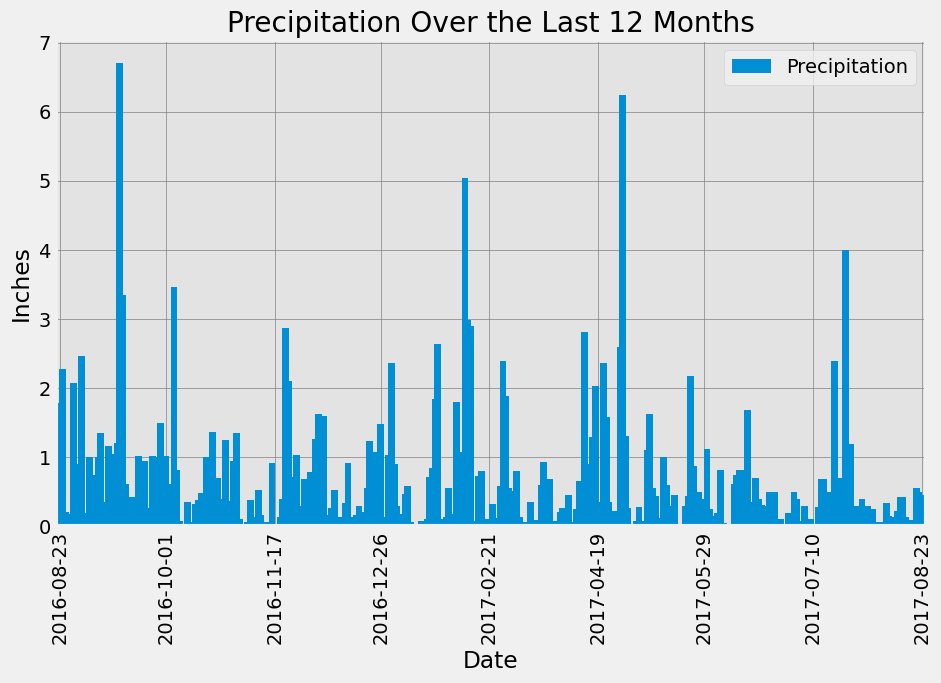

In [173]:
ax = grouped_df.plot(x='Date', y='Precipitation', kind='bar', figsize=(10,6), legend=True, width=2.5)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation Over the Last 12 Months')
tick_amount = 9
tick_positions = np.linspace(0,len(grouped_df)-1, tick_amount, dtype=int)
tick_labels = grouped_df['Date'].iloc[tick_positions].dt.strftime('%Y-%m-%d')

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

ax.set_facecolor('#e3e3e3')
ax.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray')
plt.show()
